# **Task 3: To Explore Unsupervised Machine Learning**


In [24]:
#Importing all the libraries and modules needed to complete this task
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [25]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Loading the iris dataset into pandas dataframe
df=pd.read_csv('/content/drive/My Drive/TSF/Iris.csv')
# displaying the first 10 rows of the dataframe
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
# displaying 10 random rows of the dataframe
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,115,5.8,2.8,5.1,2.4,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica


In [28]:
# displaying number of rows and columns
df.shape
#RESULT: we see that there are 150 rows and 6 columns

(150, 6)

In [29]:
# displaying the names of the columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
#basic statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
#checking missing values in the dataframe
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [32]:
# displaying number of missing values per column
df.isnull().sum()
#RESULT: we see that there are no missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

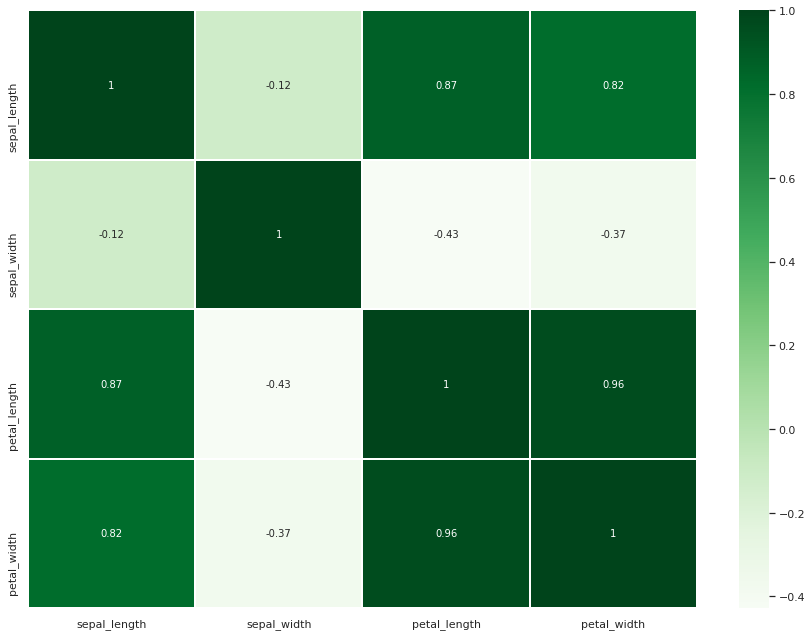

In [33]:
# heatmap to visualize correlation between all numerical values in the dataset
iris = sns.load_dataset("iris") 
fig = plt.figure(figsize=(15,11))
sns.heatmap(iris.corr(),cmap = "Greens", linecolor = 'white', linewidths = 1, annot = True )

In [34]:
# determining pairwise correlation of all the columns
df.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


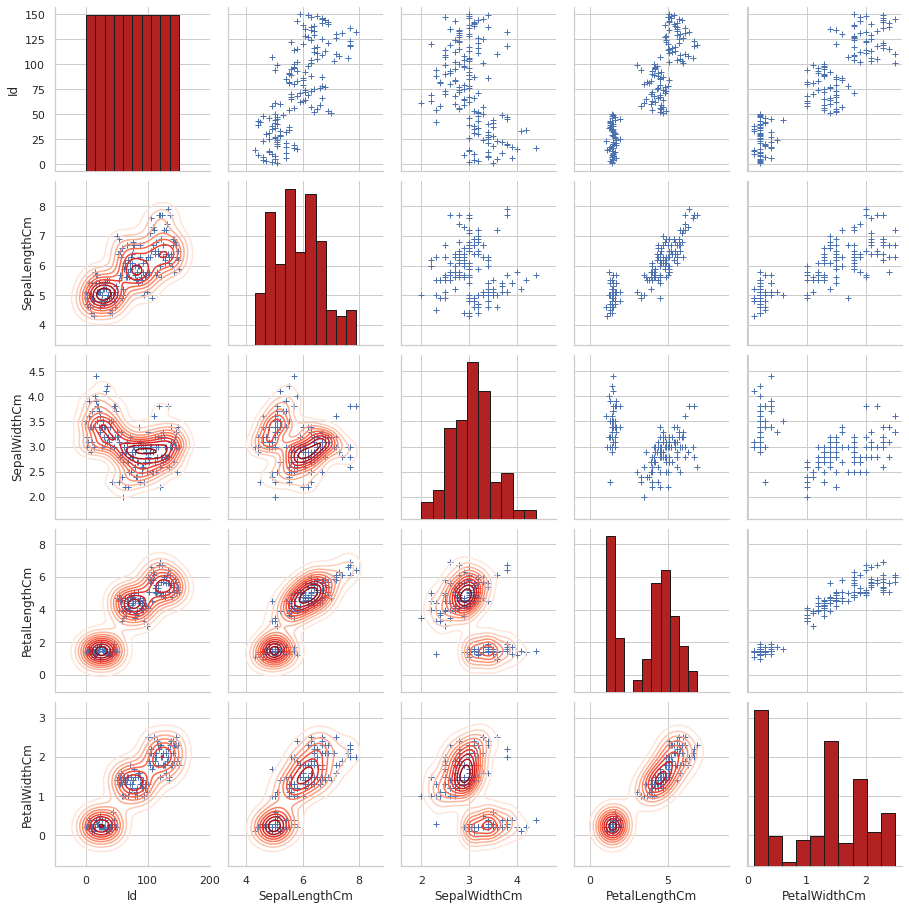

In [35]:
# visualizing relationship between each type of column variable
g=sns.pairplot(df,plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=False))
# Mapping a histogram to the diagonal
g = g.map_diag(plt.hist, bins = 10, color = 'firebrick', edgecolor = 'k')
# Mapping a density plot to the lower triangle
g = g.map_lower(sns.kdeplot, cmap = 'Reds')

In [36]:
# Using The Elbow Method to find the optimum number of clusters
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

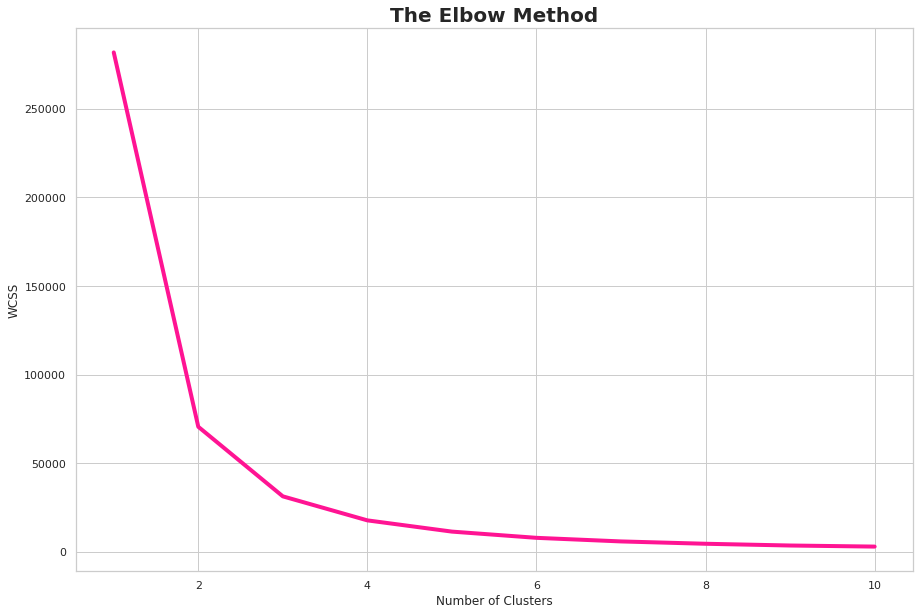

In [37]:
# Plotting the results to visualize 'the elbow'
fig = plt.figure(figsize=(15, 10))
sns.set(style='whitegrid',)
plt.plot(range(1, 11), wcss, linewidth='4', color='deeppink')
plt.title('The Elbow Method',fontweight ='bold', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
#RESULT: We can see that 'the elbow' is between 2 and 3. Therefore, the optimum number of clusters 
#should be between 2 and 3. Let us consider it as 3 and apply k-means to the dataset.

In [38]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

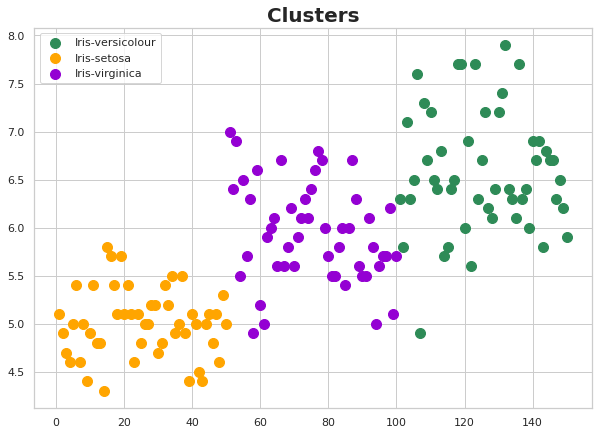

In [39]:
# Visualising the clusters
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters',fontweight ='bold', fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'darkviolet', label = 'Iris-virginica')
plt.legend()

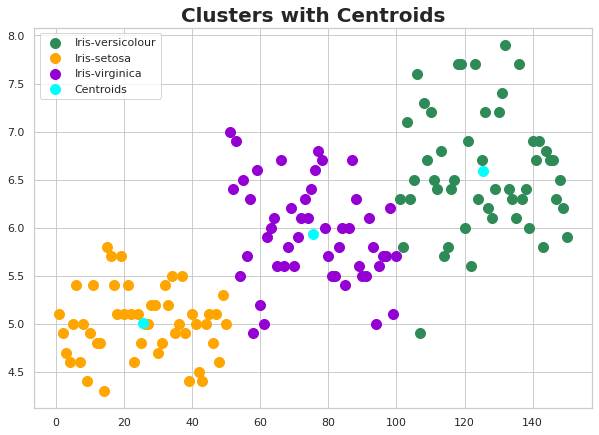

In [40]:
#visualizing the 3 clusters along with their centroids
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'darkviolet', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', 
            label = 'Centroids')
plt.legend()

# **Conclusion:**
### For the given ‘Iris’ dataset, the optimum number of clusters is 3.